# **Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC     #support vector classification
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Data Cleaning and Preprocessing**

In [3]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  4238
No of col =  16


In [4]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data = data.dropna()  #dropping rows with any Nan values

In [6]:
data.describe()  #descriptive statistics

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [8]:
#Balancing the dataset
print(len(data[data['TenYearCHD'] == 1]))
print(len(data[data['TenYearCHD'] == 0]))

557
3099


In [9]:
df1 = data[data['TenYearCHD'] == 1]
df2 = data[data['TenYearCHD'] == 0].sample(frac = 1).iloc[0:557]
data = pd.concat([df1,df2])


In [10]:
data = data.sample(frac = 1)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2889,0,49,4.0,0,0.0,0.0,0,0,0,189.0,102.0,66.5,23.88,70.0,70.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3745,0,61,1.0,0,0.0,0.0,0,1,0,240.0,163.0,112.5,26.80,75.0,82.0,0
241,1,65,1.0,1,15.0,0.0,0,1,0,219.0,148.0,90.0,29.35,77.0,97.0,1
1089,0,40,1.0,1,9.0,0.0,0,0,0,239.0,118.0,78.0,23.48,85.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0,40,2.0,1,10.0,0.0,0,0,0,216.0,112.5,76.5,27.22,75.0,77.0,0
1144,0,57,1.0,0,0.0,0.0,0,1,0,224.0,174.0,112.0,22.73,63.0,82.0,0
4171,1,41,2.0,1,43.0,0.0,0,0,0,249.0,125.0,87.0,27.13,75.0,81.0,1
2539,0,55,1.0,0,0.0,0.0,0,0,0,215.0,122.0,86.0,30.61,79.0,87.0,0


In [11]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.474865,51.909336,1.911131,0.485637,9.418312,0.040395,0.008079,0.394075,0.043088,241.147217,137.376122,84.822711,26.164749,75.995512,84.910233,0.500000
std,0.499592,8.677295,1.032361,0.500018,12.217153,0.196972,0.089560,0.488871,0.203146,45.787821,24.509215,13.162344,4.302312,12.040922,32.675032,0.500225
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.960000,44.000000,40.000000,0.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,120.000000,76.000000,23.400000,67.250000,72.000000,0.000000
50%,0.000000,52.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,239.000000,132.500000,83.000000,25.775000,75.000000,78.000000,0.500000
75%,1.000000,59.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,267.000000,150.000000,92.000000,28.557500,82.000000,88.000000,1.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,125.000000,394.000000,1.000000


In [12]:
data1 = data.iloc[: ,:-1]

# **Exploratory Data Analysis**

In [13]:
data1.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,0.005588,0.040087,0.266507,0.347064,-0.049020,-0.005498,0.013001,0.010681,-0.099052,-0.039878,0.034471,0.005943,-0.078805,0.001348
age,0.005588,1.000000,-0.148437,-0.200442,-0.165485,0.146179,0.061062,0.301138,0.103648,0.161047,0.367914,0.148892,0.097642,-0.047145,0.122198
education,0.040087,-0.148437,1.000000,0.029725,0.041347,0.004414,-0.060251,-0.051603,-0.054556,0.046503,-0.105295,-0.028568,-0.126117,-0.047230,-0.023063
currentSmoker,0.266507,-0.200442,0.029725,1.000000,0.793737,-0.071645,-0.027502,-0.110983,-0.064664,-0.045901,-0.121811,-0.085608,-0.150242,0.058264,-0.054576
cigsPerDay,0.347064,-0.165485,0.041347,0.793737,1.000000,-0.077967,-0.040864,-0.095621,-0.053969,-0.035106,-0.085664,-0.053556,-0.115071,0.067631,-0.035278
BPMeds,-0.049020,0.146179,0.004414,-0.071645,-0.077967,1.000000,0.032415,0.254412,0.091186,0.099160,0.288857,0.191115,0.058234,0.051597,0.105543
prevalentStroke,-0.005498,0.061062,-0.060251,-0.027502,-0.040864,0.032415,1.000000,0.070866,0.030233,0.002120,0.053463,0.048090,0.018788,0.010865,0.014064
prevalentHyp,0.013001,0.301138,-0.051603,-0.110983,-0.095621,0.254412,0.070866,1.000000,0.100280,0.126250,0.691739,0.603874,0.275712,0.160872,0.122640
diabetes,0.010681,0.103648,-0.054556,-0.064664,-0.053969,0.091186,0.030233,0.100280,1.000000,0.041335,0.114759,0.073927,0.132954,0.091540,0.722170
totChol,-0.099052,0.161047,0.046503,-0.045901,-0.035106,0.099160,0.002120,0.126250,0.041335,1.000000,0.175057,0.121586,0.086014,0.074618,0.063723


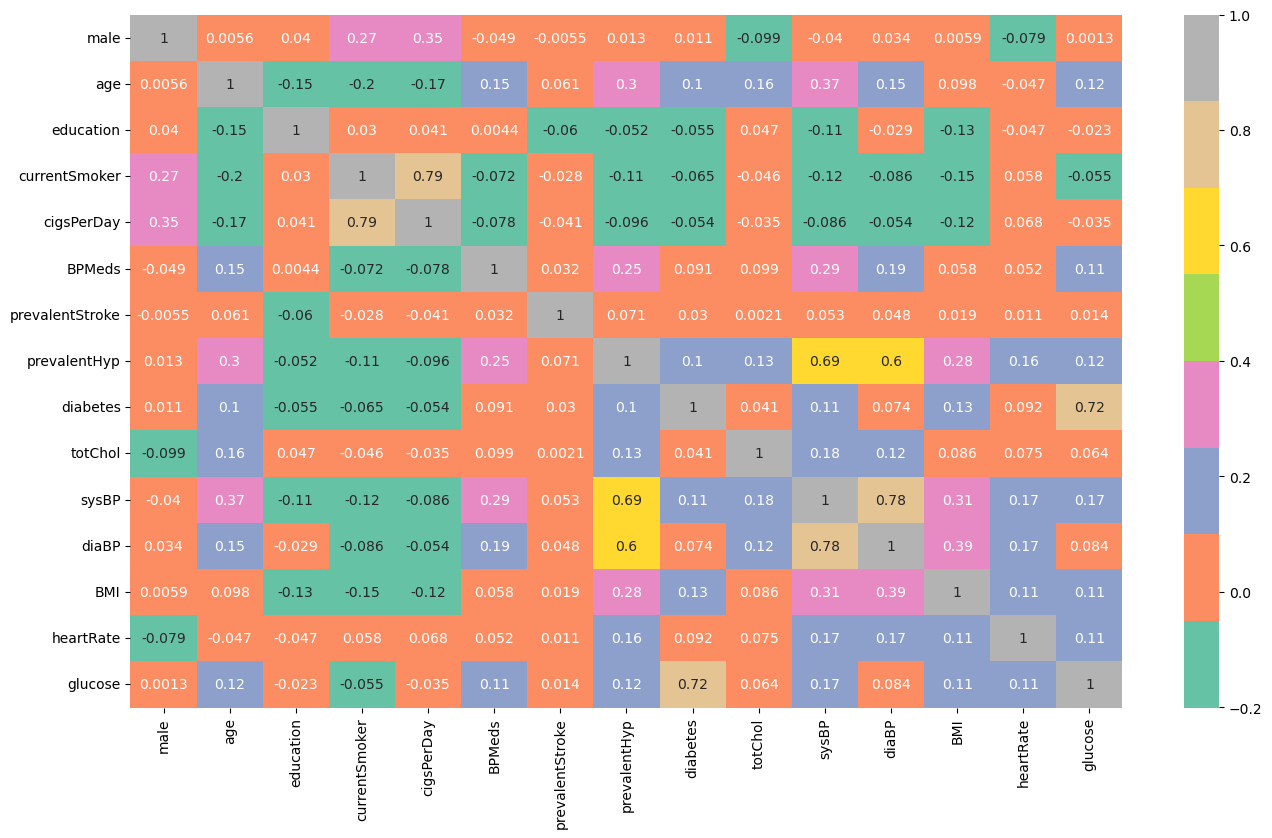

In [14]:
plt.figure(figsize=(16,9))
corr = data1.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


# **Training and Normalization of data**

In [ ]:
# training and normalization of data
X = data.iloc[:,:-1]
Y = data.iloc[:,15:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [16]:
# def roc_curve(Y_test, Y_score):
#     from sklearn.metrics import roc_curve, auc
#     fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
#     score = metrics.auc(fpr, tpr)

#     fig = px.area(
#         #fpr = False Positive Rate; tpr= True Positive Rate
#         x=fpr, y=tpr,
#         title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#         labels=dict(x='False Positive Rate', y='True Positive Rate'),
#         width=700, height=500
#     )

#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [17]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



C:\Users\Acer\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [18]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1927,0,42,2.0,1,25.0,0.0,0,0,0,286.0,133.5,80.0,26.25,75.0,65.0
403,0,41,1.0,0,0.0,0.0,0,0,0,179.0,116.0,67.0,18.58,73.0,68.0
2514,0,36,1.0,0,0.0,0.0,0,0,0,211.0,100.0,61.5,22.19,60.0,73.0
2286,0,39,2.0,1,9.0,0.0,0,0,0,270.0,110.0,78.0,22.00,75.0,68.0
3143,0,58,1.0,1,15.0,0.0,0,1,0,275.0,140.0,78.0,19.18,78.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,0,51,2.0,1,15.0,0.0,0,0,0,220.0,137.0,79.0,21.66,80.0,74.0
4004,1,39,1.0,1,20.0,0.0,0,0,0,186.0,126.0,67.0,22.04,63.0,72.0
2334,0,40,2.0,0,0.0,0.0,0,0,0,267.0,150.0,93.0,31.77,93.0,74.0
1341,1,52,1.0,1,25.0,0.0,0,0,0,271.0,121.0,73.0,21.85,70.0,86.0


# **Prediction and Evaluation**

In [19]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [20]:
pd.DataFrame({'Results':list(Y_pred)})

,Results
0,0
1,0
2,0
3,0
4,1
...,...
218,0
219,0
220,0
221,0


In [21]:
svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
svc_accuracy

65.92

In [22]:
d = X_test.iloc[0:1]
d

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1927,0,42,2.0,1,25.0,0.0,0,0,0,286.0,133.5,80.0,26.25,75.0,65.0


In [23]:
Y_test.iloc[0:1]

,TenYearCHD
1927,0


In [24]:
Y_pred = svc.predict(X_test.iloc[0:1])
Y_pred

array([0], dtype=int64)

In [25]:
# Pregnancies = float(input("Enter Pregnancies = "))
# Glucose = float(input("Enter Glucose = "))
# BloodPressure = float(input("Enter BloodPressure = "))
# SkinThickness = float(input("Enter SkinThickness = "))
# Insulin = float(input("Enter Insulin = "))
# BMI = float(input("Enter BMI = "))
# DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
# Age = float(input("Enter Age = "))

# new_data = {'Pregnancies':[Pregnancies],
#             'Glucose':[Glucose],
#             'BloodPressure':[BloodPressure],
#             'SkinThickness':[SkinThickness],
#             'Insulin':[Insulin],
#             'BMI':[BMI],
#             'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
#             'Age':[Age]}
# d = pd.DataFrame(new_data)

In [26]:
Y_score = svc.predict(d)
print(Y_score)

[0]


In [27]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [ ]:
X_pred = svc.predict(d)
pr

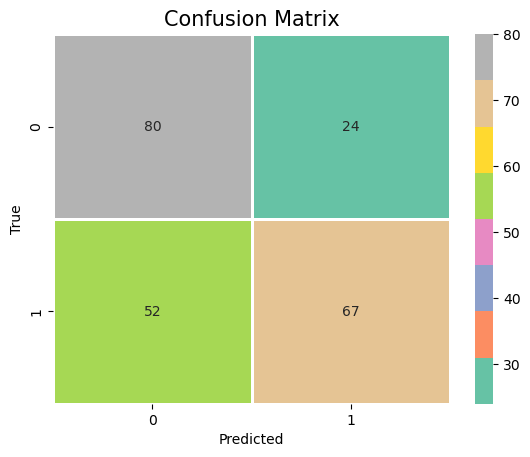

In [28]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)

class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [29]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[80, 24],
       [52, 67]], dtype=int64)

In [30]:
len(X_test)

223

In [31]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [32]:
Y_test

,TenYearCHD
1927,0
403,0
2514,0
2286,0
3143,1
...,...
3610,0
4004,0
2334,0
1341,1


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       104
           1       0.74      0.56      0.64       119

    accuracy                           0.66       223
   macro avg       0.67      0.67      0.66       223
weighted avg       0.68      0.66      0.66       223



In [3]:
 #A 66% accuracy indicates that the model correctly predicts the presence or absence of coronary heart disease (CHD) in 66% of the cases.